In [1]:
import numpy as np
from scipy.integrate import quad as quad
from numpy import log, cosh, exp, linspace, zeros, mean, sqrt
import matplotlib.pyplot as plt

In [6]:
N = 101
ks = np.linspace(0, 0.5, N)
free_eks = ks**2
q = 1
A = 1
Delta = 0.05
free_eks_q = (ks - q)**2
peierls_eks_minus =  (free_eks+free_eks_q - sqrt((free_eks-free_eks_q)**2+(A**2)*Delta**2/4))/2
peierls_eks_plus =  (free_eks+free_eks_q + sqrt((free_eks-free_eks_q)**2+(A**2)*Delta**2/4))/2

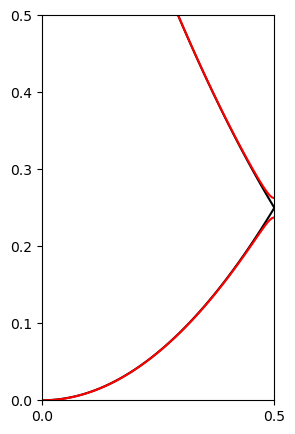

In [7]:
plt.figure(figsize=(3, 5))
plt.plot(ks, free_eks, color="black");
plt.plot(ks, free_eks_q, color="black");

plt.plot(ks, peierls_eks_minus, color="red");
plt.plot(ks, peierls_eks_plus, color="red");
plt.ylim(0, 0.5)
plt.xticks([0, 0.5])
plt.xlim(0, 0.5);

In [86]:
n_ts = 101
n_deltas = 101
#mu_peierls = 0.25
Ts = np.linspace(0.0001, 0.0005, n_ts)
best_deltas = np.zeros(n_ts);
total_energy_array = np.zeros((n_ts, n_deltas))
all_mus = np.zeros((n_ts, n_deltas))
tot_electrons = np.zeros((n_ts, n_deltas))
for (T_idx, T) in enumerate(Ts):
    if (T_idx + 1) % 10 == 0:
        print(f"T_idx: {T_idx + 1}", flush=True)
    Deltas = np.linspace(0, 0.005, n_deltas)
    total_energy_peierls = np.zeros(n_deltas)
    beta = 1/T
    
    for (Delta_idx, Delta) in enumerate(Deltas):
        peierls_eks_minus =  (free_eks+free_eks_q - sqrt((free_eks-free_eks_q)**2+(A**2)*Delta**2/4))/2
        peierls_eks_plus =  (free_eks+free_eks_q + sqrt((free_eks-free_eks_q)**2+(A**2)*Delta**2/4))/2

        n_mus = 2001
        mus = np.linspace(0.2499, 0.2501, n_mus)
        n_s = np.zeros(n_mus)
        
        for (mu_idx, mu) in enumerate(mus):
            fermi_x_minus = np.where((peierls_eks_minus-mu) < 20/beta, (peierls_eks_minus-mu)*beta, 20) 
            fermi_x_plus = np.where((peierls_eks_plus-mu) < 20/beta, (peierls_eks_plus-mu)*beta, 20) 
            fermi_peierls_eks_minus = 1/(exp(fermi_x_minus)+1)
            fermi_peierls_eks_plus = 1/(exp(fermi_x_plus)+1)

            n_s[mu_idx] = ((fermi_peierls_eks_minus + fermi_peierls_eks_plus).sum())/N
        mu_peierls = mus[np.argmin(np.abs(n_s - 1))]
        number_of_electrons = n_s[np.argmin(np.abs(n_s - 1))]
        tot_electrons[T_idx, Delta_idx] = number_of_electrons
        all_mus[T_idx, Delta_idx] = mu_peierls
        fermi_x_minus = np.where((peierls_eks_minus-mu_peierls) < 20/beta, (peierls_eks_minus-mu_peierls)*beta, 20) 
        fermi_x_plus = np.where((peierls_eks_plus-mu_peierls) < 20/beta, (peierls_eks_plus-mu_peierls)*beta, 20) 

        fermi_peierls_eks_minus = 1/(exp(fermi_x_minus)+1)
        fermi_peierls_eks_plus = 1/(exp(fermi_x_plus)+1)
        total_energy_peierls[Delta_idx] = (fermi_peierls_eks_minus * peierls_eks_minus + fermi_peierls_eks_plus * peierls_eks_plus).sum() + Delta**2*N
    best_deltas[T_idx] = Deltas[np.argmin(total_energy_peierls)]

T_idx: 10
T_idx: 20
T_idx: 30
T_idx: 40
T_idx: 50
T_idx: 60
T_idx: 70
T_idx: 80
T_idx: 90
T_idx: 100


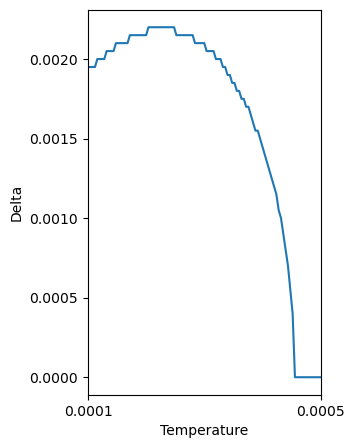

In [118]:
plt.figure(figsize=(3, 5))
plt.plot(Ts, best_deltas)#, s=10, color="black")
plt.xlim(np.min(Ts), np.max(Ts))
#plt.ylim(0, 0.1);
plt.xlabel("Temperature")
plt.ylabel("Delta");
plt.xticks([np.min(Ts), np.max(Ts)]);